#### Import Drive & Data

In [ ]:
# Import Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read the data
path = '/content/drive/MyDrive/Clientes/Axial/DB/1 minuto/'
file = 'min_01_01_21-21_10_21_4station_21V.csv'
all_data = pd.read_csv(path+file,sep=";",decimal=",")

In [ ]:
all_data.head()

Datetime  ...  Meteo Station General - Radiation Inclined Pyranometer 2(W/m2)
0  2021-01-01 00:00:00  ...                                                0.0             
1  2021-01-01 00:01:00  ...                                                0.0             
2  2021-01-01 00:02:00  ...                                                0.0             
3  2021-01-01 00:03:00  ...                                                0.0             
4  2021-01-01 00:04:00  ...                                                0.0             

[5 rows x 54 columns]

In [ ]:
# All Data shape
print('Data size: ',all_data.shape)
print(f'{all_data.shape[0]} minutes, {round(all_data.shape[0]/60,ndigits=2)} hours, {round(all_data.shape[0]/60/24,ndigits=2)} days')

Data size:  (423300, 54)
423300 minutes, 7055.0 hours, 293.96 days


In [ ]:
# Truncate Data (pick last days)
trunc_days = 60
trunc_mins = trunc_days*24*60
data       = all_data[-trunc_mins:-1]
print('Data size: ',data.shape)
print(f'{data.shape[0]} minutes, {round(data.shape[0]/60,ndigits=2)} hours, {round(data.shape[0]/60/24,ndigits=2)} days')

Data size:  (86399, 54)
86399 minutes, 1439.98 hours, 60.0 days


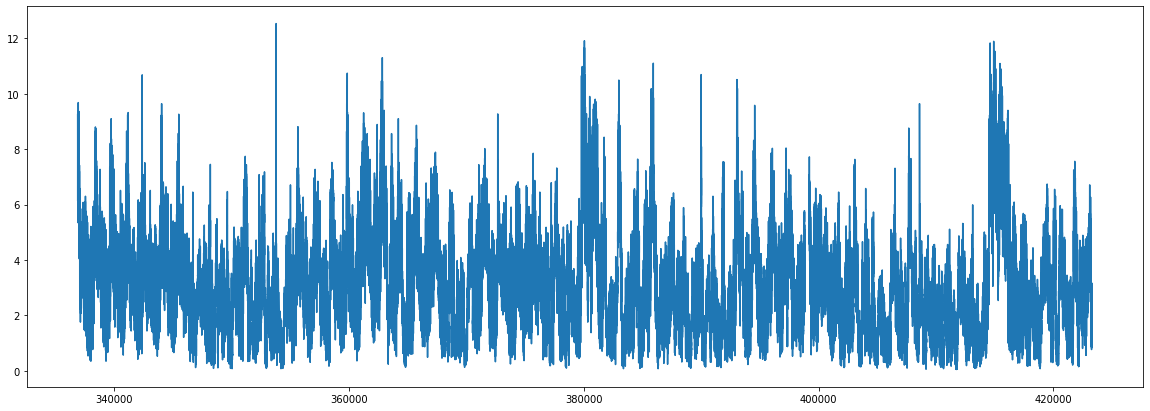

In [ ]:
# Plot wind speed
plt.figure(figsize=(20,7))
plt.plot(data.index.values,data['Meteo Station 07 - Wind Speed(m/s)'])
pass

In [ ]:
data.columns

Index(['Datetime', 'Meteo Station 04 - Insolation(Wh/m2)',
       'Meteo Station 04 - Insolation Horizontal Pyranometers(Wh/m2)',
       'Meteo Station 04 - Insolation Inclined Pyranometers(Wh/m2)',
       'Meteo Station 04 - Radiation(W/m2)',
       'Meteo Station 04 - Radiation Horizontal Pyranometers(W/m2)',
       'Meteo Station 04 - Radiation Inclined Pyranometers(W/m2)',
       'Meteo Station 04 - Atmospheric Pressure(mB)',
       'Meteo Station 04 - External Ambient Temperature(ºC)',
       'Meteo Station 04 - Humidity(%)',
       'Meteo Station 04 - Module Temperature(ºC)',
       'Meteo Station 04 - Wind Direction(º)',
       'Meteo Station 04 - Wind Speed(m/s)',
       'Meteo Station 04 - Radiation Inclined Pyranometer 1(W/m2)',
       'Meteo Station 04 - Insolation Inclined Pyranometer 1(Wh/m2)',
       'Meteo Station 04 - Radiation Inclined Pyranometer 2(W/m2)',
       'Meteo Station 04 - Insolation Inclined Pyranometer 2(Wh/m2)',
       'Meteo Station 04 - Wind Direction R

In [ ]:
# Get rid of outliers
data['Meteo Station 04 - Wind Speed(m/s)'] = data['Meteo Station 04 - Wind Speed(m/s)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 04 - Wind Direction(º)'] = data['Meteo Station 04 - Wind Direction(º)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 04 - Wind Direction Rad(rad)'] = data['Meteo Station 04 - Wind Direction Rad(rad)'].apply(lambda x : 0 if x<-10 else x)
data['Meteo Station 04 - Atmospheric Pressure(mB)'] = data['Meteo Station 04 - Atmospheric Pressure(mB)'].apply(lambda x : 887.82 if x<500 else x)
data['Meteo Station 04 - External Ambient Temperature(ºC)'] = data['Meteo Station 04 - External Ambient Temperature(ºC)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 04 - Humidity(%)'] = data['Meteo Station 04 - Humidity(%)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 10 - Wind Direction(º)'] = data['Meteo Station 10 - Wind Direction(º)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 10 - Wind Speed(m/s)'] = data['Meteo Station 10 - Wind Speed(m/s)'].apply(lambda x : 0 if x<-1000 else x)
data['Meteo Station 10 - Wind Direction Rad(rad)'] = data['Meteo Station 10 - Wind Direction Rad(rad)'].apply(lambda x : 0 if x<-10 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

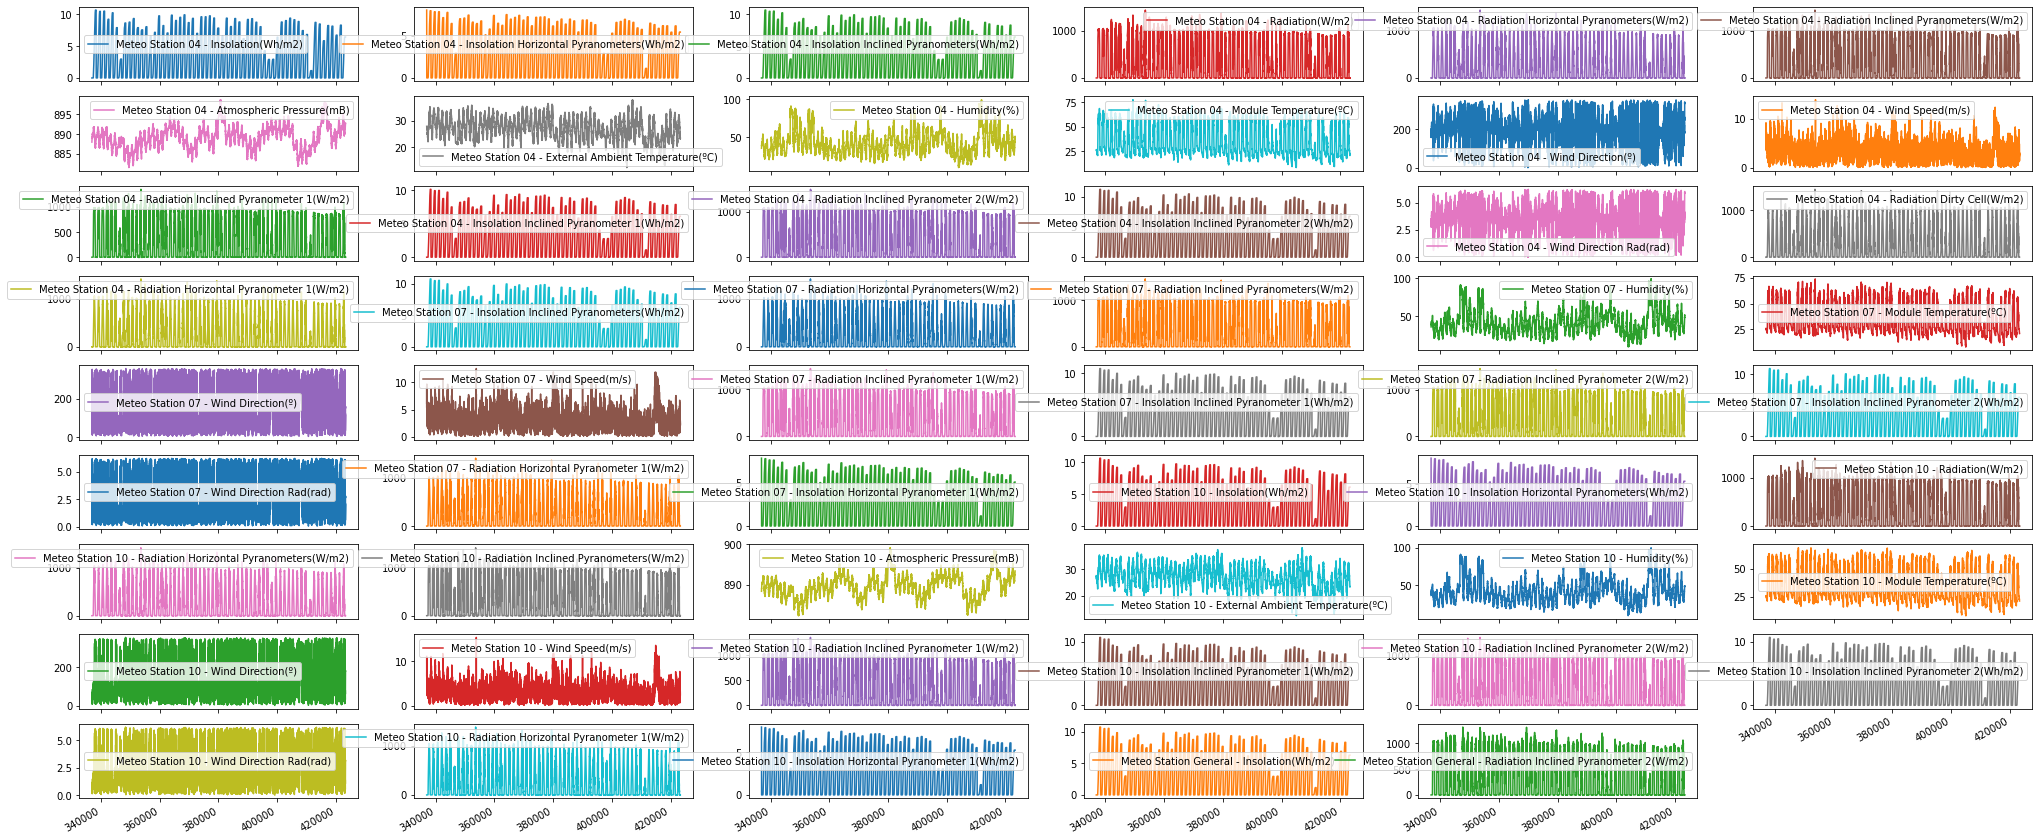

In [ ]:
# Plot all the columns
data.plot(subplots=True,layout=(10,6),figsize=(35,18))
pass

In [ ]:
def plot_merged_4st(data):
  '''
  Plot next columns grouped by station:
  - Wind Speed(m/s)
  - Wind Direction Rad(rad)
  - Humidity(%)
  - Atmospheric Pressure(mB)
  - Module Temperature(ºC)
  - External Ambient Temperature(ºC)
  - Radiation(W/m2)
  - Insolation(Wh/m2)
  '''
  
  # Plot all variables and merge
  f, ax  = plt.subplots(4,2,figsize=(35,20))
  alpha=0.2

  # Wind speed
  ax[0,0].plot(data['Meteo Station 04 - Wind Speed(m/s)'],label='Station 04',alpha=alpha)
  ax[0,0].plot(data['Meteo Station 07 - Wind Speed(m/s)'],label='Station 07',alpha=alpha)
  ax[0,0].plot(data['Meteo Station 10 - Wind Speed(m/s)'],label='Station 10',alpha=alpha)
  ax[0,0].set_title('Wind Speed(m/s)')
  ax[0,0].legend(loc='upper left')

  # Wind direction
  ax[0,1].plot(data['Meteo Station 04 - Wind Direction Rad(rad)'],label='Station 04',alpha=alpha)
  ax[0,1].plot(data['Meteo Station 07 - Wind Direction Rad(rad)'],label='Station 07',alpha=alpha)
  ax[0,1].plot(data['Meteo Station 10 - Wind Direction Rad(rad)'],label='Station 10',alpha=alpha)
  ax[0,1].set_title('Wind Direction(rad)')
  ax[0,1].legend(loc='upper left')
  alpha
  
  # Humidity
  ax[1,1].plot(data['Meteo Station 04 - Humidity(%)'],label='Station 04',alpha=alpha)
  ax[1,1].plot(data['Meteo Station 07 - Humidity(%)'],label='Station 07',alpha=alpha)
  ax[1,1].plot(data['Meteo Station 10 - Humidity(%)'],label='Station 10',alpha=alpha)
  ax[1,1].set_title('Humidity(%)')
  ax[1,1].legend(loc='upper left')

  # Atmospheric pressure
  ax[1,0].plot(data['Meteo Station 04 - Atmospheric Pressure(mB)'],label='Station 04',alpha=alpha)
  # ax[1,0].plot(data['Meteo Station 07 - Atmospheric Pressure(mB)'],label='Station 07',alpha=alpha) # No data
  ax[1,0].plot(data['Meteo Station 10 - Atmospheric Pressure(mB)'],label='Station 10',alpha=alpha)
  ax[1,0].set_title('Atmospheric Pressure(mB)')
  ax[1,0].legend(loc='upper left')

  # Module temperature
  ax[2,0].plot(data['Meteo Station 04 - Module Temperature(ºC)'],label='Station 04',alpha=alpha)
  ax[2,0].plot(data['Meteo Station 07 - Module Temperature(ºC)'],label='Station 07',alpha=alpha)
  ax[2,0].plot(data['Meteo Station 10 - Module Temperature(ºC)'],label='Station 10',alpha=alpha)
  ax[2,0].set_title('Module Temperature(ºC)')
  ax[2,0].legend(loc='upper left')

  # External ambient temperature
  ax[2,1].plot(data['Meteo Station 04 - External Ambient Temperature(ºC)'],label='Station 04',alpha=alpha)
  # ax[2,1].plot(data['Meteo Station 07 - External Ambient Temperature(ºC)'],label='Station 07',alpha=alpha3) # No data
  ax[2,1].plot(data['Meteo Station 10 - External Ambient Temperature(ºC)'],label='Station 10',alpha=alpha)
  ax[2,1].set_title('External Ambient Temperature(ºC)')
  ax[2,1].legend(loc='upper left')

  # Radiation
  ax[3,0].plot(data['Meteo Station 04 - Radiation(W/m2)'],label='Station 04',alpha=alpha)
  # ax[3,0].plot(data['Meteo Station 04 - Radiation(W/m2)'],label='Station 07',alpha=alpha) # No data
  ax[3,0].plot(data['Meteo Station 10 - Radiation(W/m2)'],label='Station 10',alpha=alpha)
  ax[3,0].set_title('Radiation(W/m2)')
  ax[3,0].legend(loc='upper left')

  # Insolation
  ax[3,1].plot(data['Meteo Station 04 - Insolation(Wh/m2)'],label='Station 04',alpha=alpha)
  ax[3,1].plot(data['Meteo Station 10 - Insolation(Wh/m2)'],label='Station 10',alpha=alpha)
  ax[3,1].plot(data['Meteo Station General - Insolation(Wh/m2)'],label='Station General',alpha=alpha)
  ax[3,1].set_title('Insolation(Wh/m2)')
  ax[3,1].legend(loc='upper left')
  pass

In [ ]:
def plot_merged_4st_wind_press_hum(data):
  '''
  Plot next columns grouped by station:
  - Wind Speed(m/s)
  - Atmospheric Pressure(mB)
  - Humidity(%)
  '''
  
  # Plot all variables and merge
  f, ax  = plt.subplots(3,1,figsize=(35,20))
  alpha=0.2

  # Wind speed
  ax[0].plot(data['Meteo Station 04 - Wind Speed(m/s)'],label='Station 04',alpha=alpha)
  ax[0].plot(data['Meteo Station 07 - Wind Speed(m/s)'],label='Station 07',alpha=alpha)
  ax[0].plot(data['Meteo Station 10 - Wind Speed(m/s)'],label='Station 10',alpha=alpha)
  ax[0].set_title('Wind Speed(m/s)')
  ax[0].legend(loc='upper left')
  
  # Atmospheric pressure
  ax[1].plot(data['Meteo Station 04 - Atmospheric Pressure(mB)'],label='Station 04',alpha=alpha)
  # ax[1].plot(data['Meteo Station 07 - Atmospheric Pressure(mB)'],label='Station 07',alpha=alpha) # No data
  ax[1].plot(data['Meteo Station 10 - Atmospheric Pressure(mB)'],label='Station 10',alpha=alpha)
  ax[1].set_title('Atmospheric Pressure(mB)')
  ax[1].legend(loc='upper left')
  
  # Humidity
  ax[2].plot(data['Meteo Station 04 - Humidity(%)'],label='Station 04',alpha=alpha)
  ax[2].plot(data['Meteo Station 07 - Humidity(%)'],label='Station 07',alpha=alpha)
  ax[2].plot(data['Meteo Station 10 - Humidity(%)'],label='Station 10',alpha=alpha)
  ax[2].set_title('Humidity(%)')
  ax[2].legend(loc='upper left')
  pass

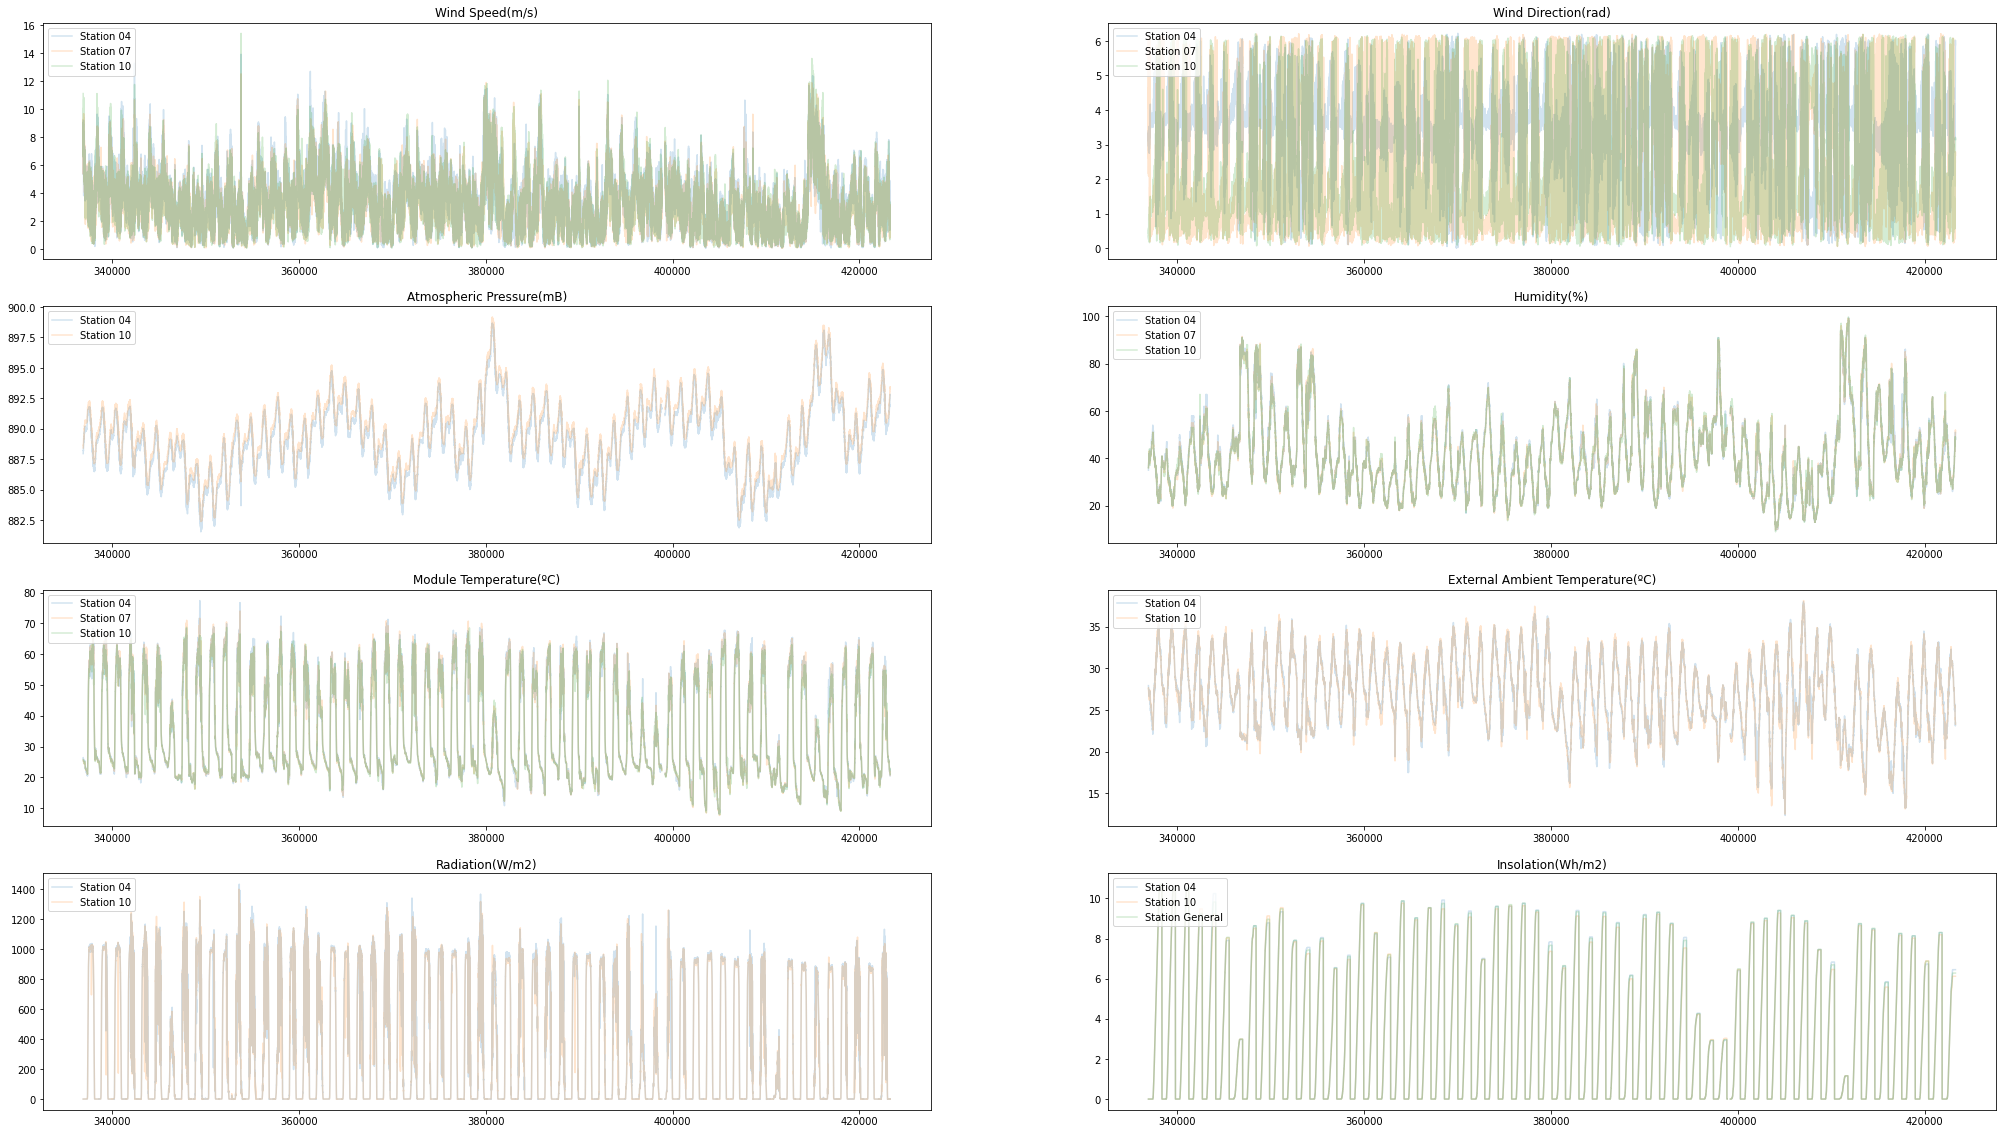

In [ ]:
# Data with Na
plot_merged_4st(data)

In [ ]:
# Clean Na and check if data_noNa contains Na
data_noNa = data.dropna()
for i in data_noNa.columns[1:]:
  print(f'{data_noNa[i].isna().unique()} --- {i}')

[False] --- Meteo Station 04 - Insolation(Wh/m2)
[False] --- Meteo Station 04 - Insolation Horizontal Pyranometers(Wh/m2)
[False] --- Meteo Station 04 - Insolation Inclined Pyranometers(Wh/m2)
[False] --- Meteo Station 04 - Radiation(W/m2)
[False] --- Meteo Station 04 - Radiation Horizontal Pyranometers(W/m2)
[False] --- Meteo Station 04 - Radiation Inclined Pyranometers(W/m2)
[False] --- Meteo Station 04 - Atmospheric Pressure(mB)
[False] --- Meteo Station 04 - External Ambient Temperature(ºC)
[False] --- Meteo Station 04 - Humidity(%)
[False] --- Meteo Station 04 - Module Temperature(ºC)
[False] --- Meteo Station 04 - Wind Direction(º)
[False] --- Meteo Station 04 - Wind Speed(m/s)
[False] --- Meteo Station 04 - Radiation Inclined Pyranometer 1(W/m2)
[False] --- Meteo Station 04 - Insolation Inclined Pyranometer 1(Wh/m2)
[False] --- Meteo Station 04 - Radiation Inclined Pyranometer 2(W/m2)
[False] --- Meteo Station 04 - Insolation Inclined Pyranometer 2(Wh/m2)
[False] --- Meteo Stati

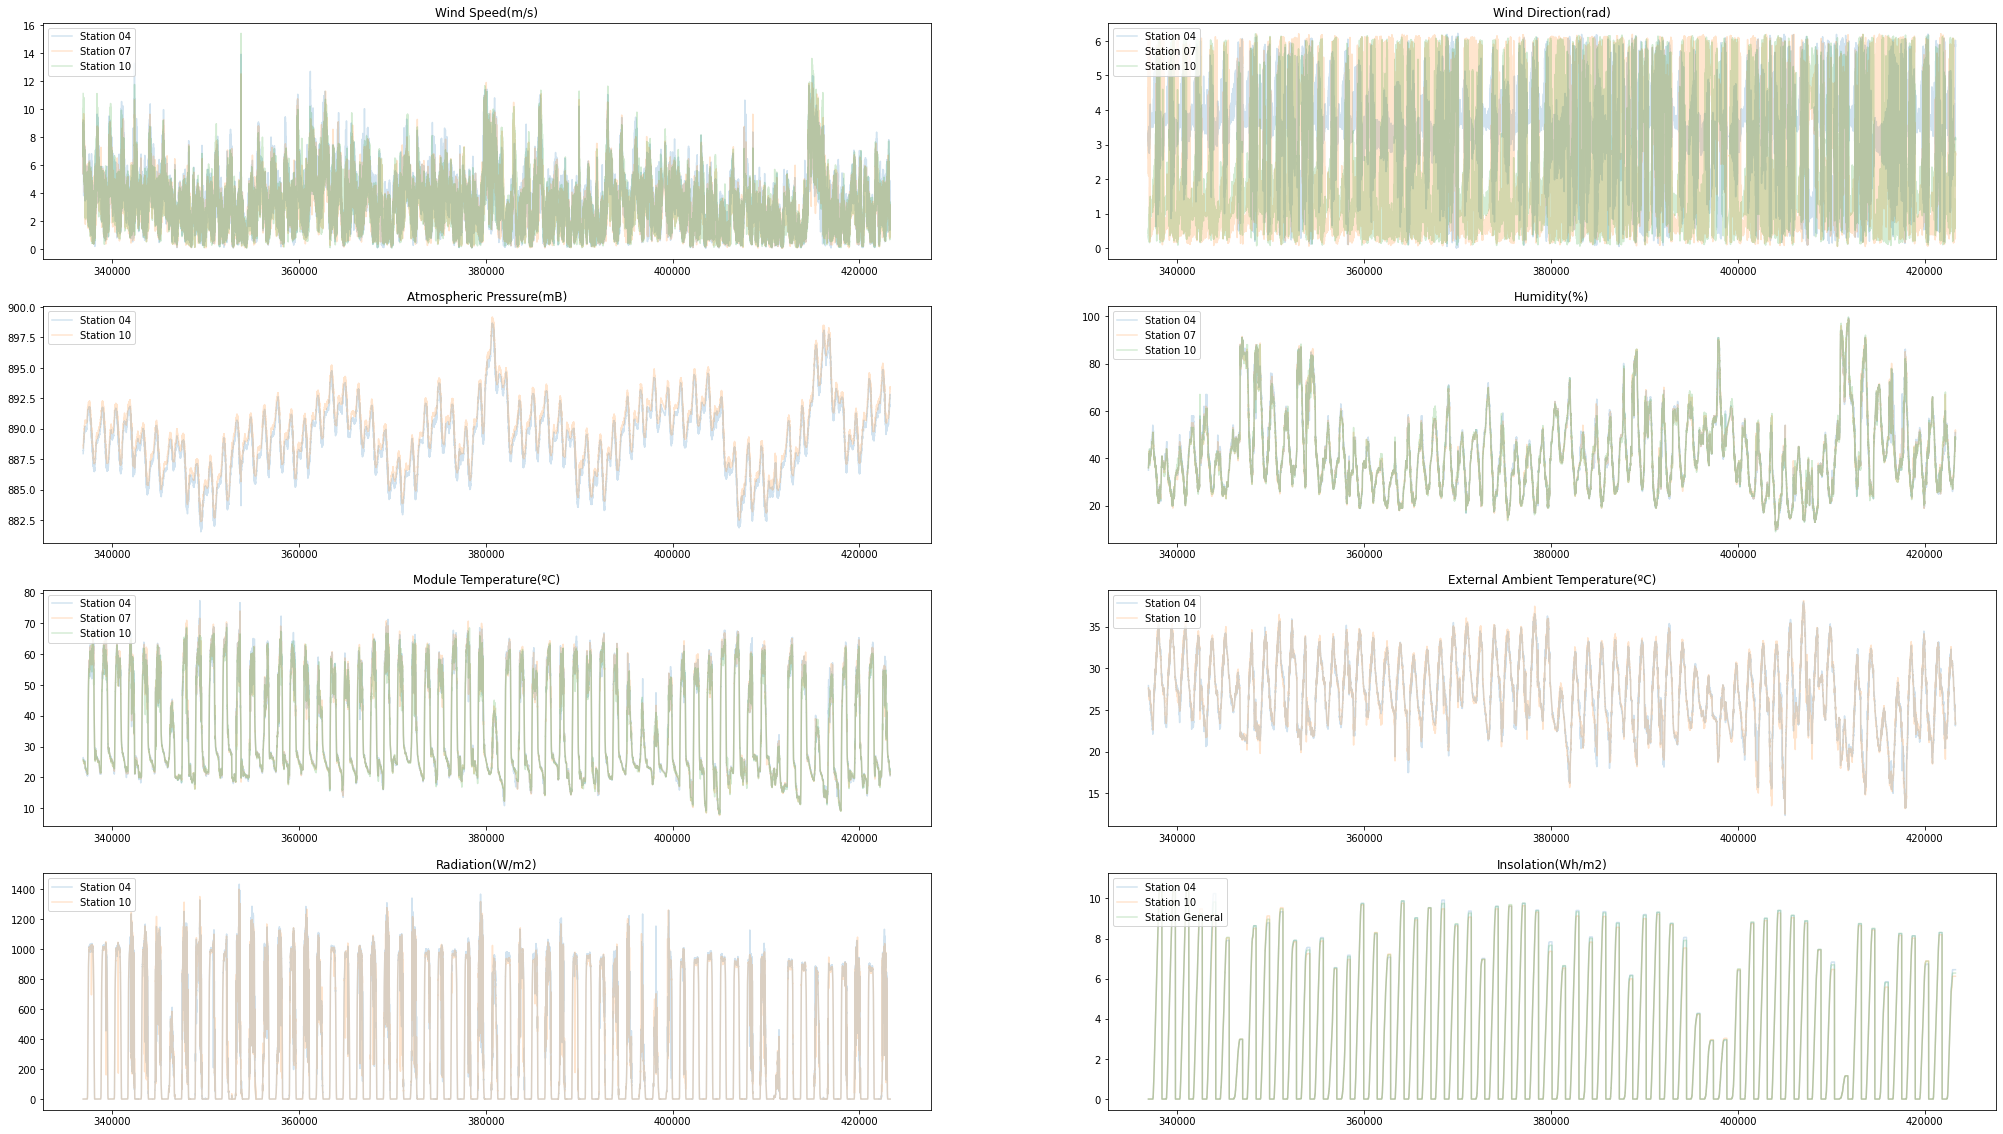

In [ ]:
# Data without Na
plot_merged_4st(data_noNa)

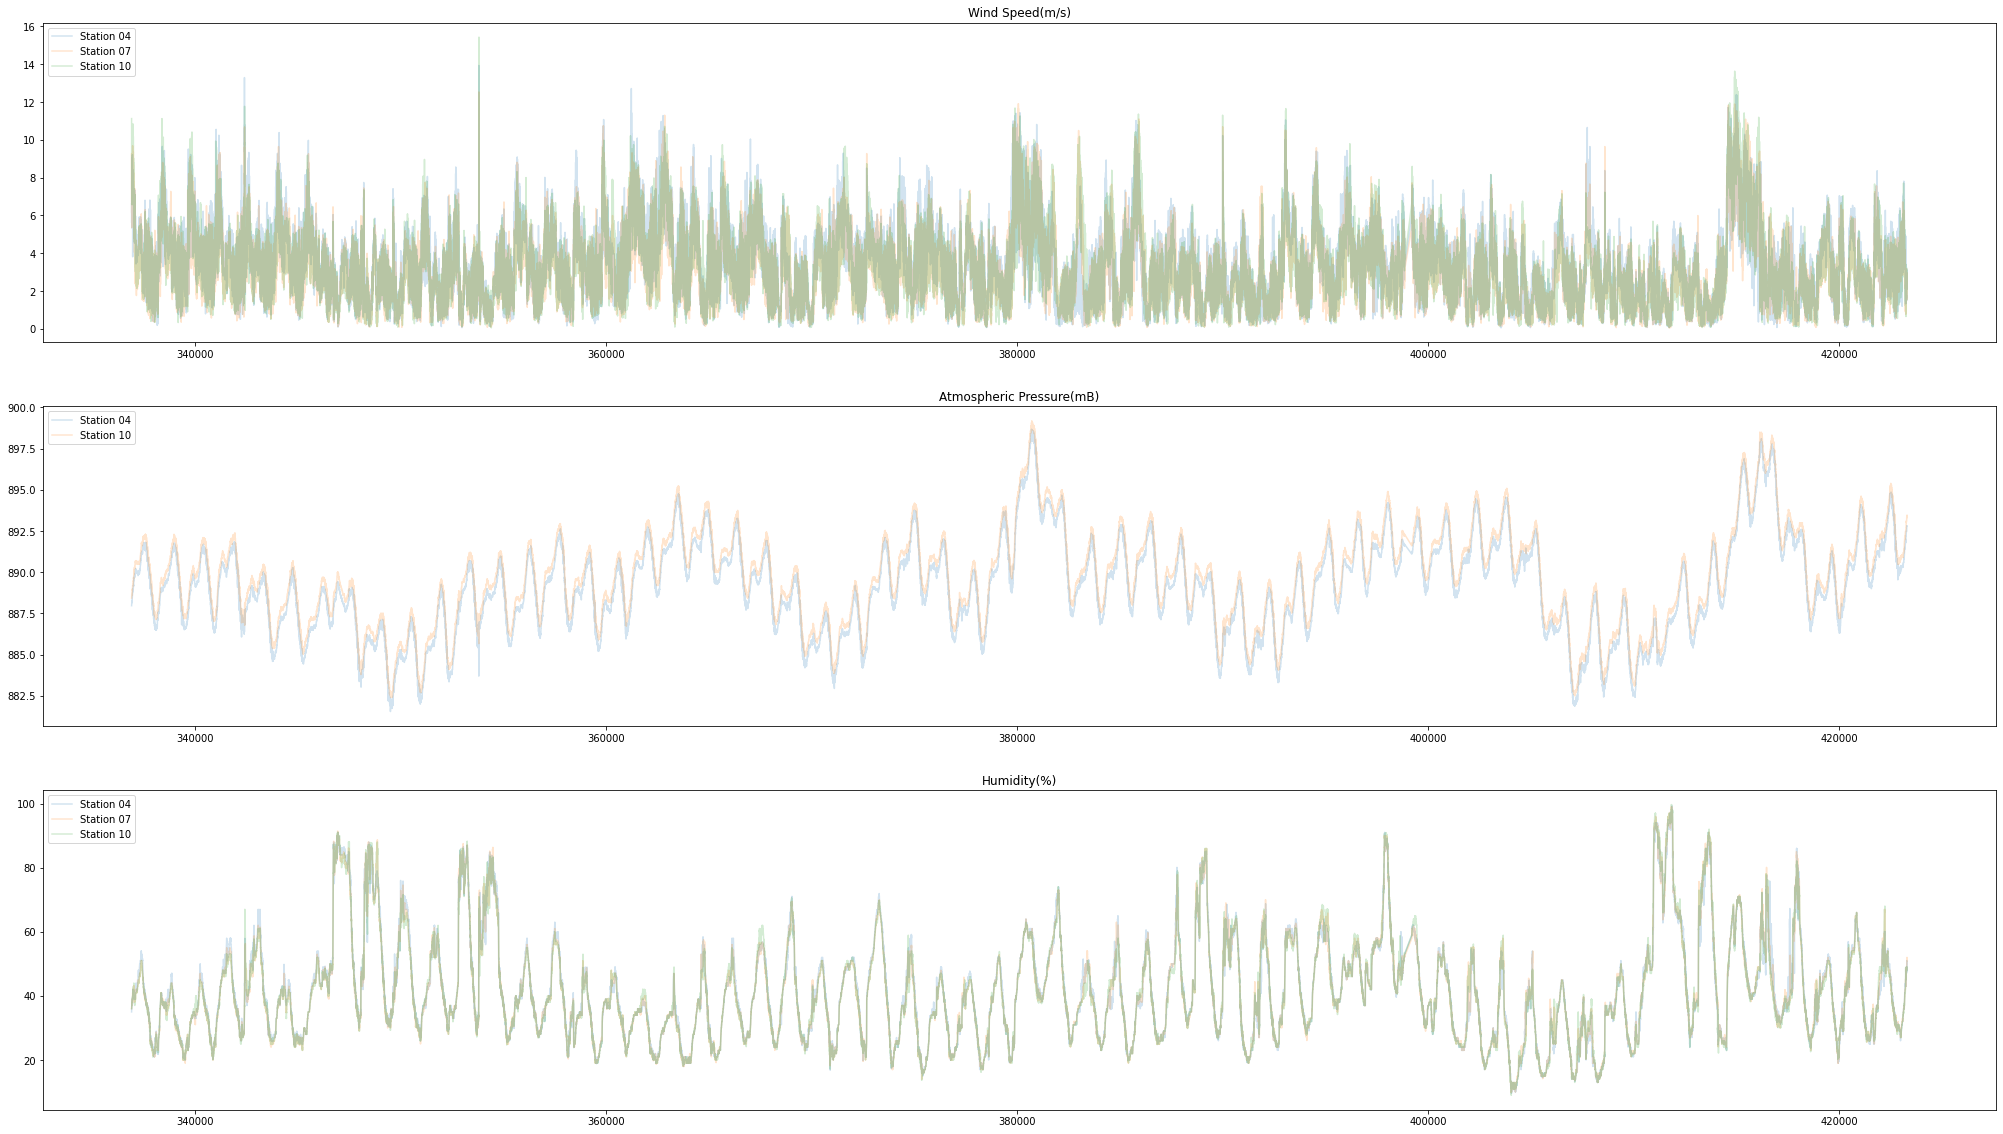

In [ ]:
plot_merged_4st_wind_press_hum(data_noNa)

#### Savitzky–Golay filter over all data

In [ ]:
# Apply Savitzky-Golay filter through all the data
from scipy.signal import savgol_filter
savgol_data = pd.DataFrame()
savgol_data[data_noNa.columns[0]] = data_noNa[data_noNa.columns[0]]
for col in data_noNa.columns[1:]:
  savgol_data[col] = savgol_filter(data_noNa[col], 21, 1)

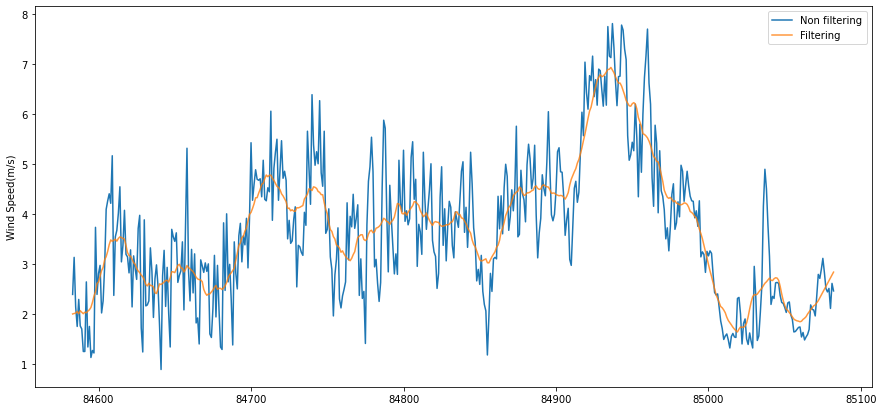

In [ ]:
# Check the smoothed signal by Savitzky-Golay
plot_trunc = 500
f = plt.figure(figsize=(15,7))
timeline = np.linspace(0,savgol_data.shape[0],num=savgol_data.shape[0])
plt.plot(timeline[-plot_trunc:],data_noNa['Meteo Station 04 - Wind Speed(m/s)'][-plot_trunc:],label='Non filtering')
plt.plot(timeline[-plot_trunc:],savgol_data['Meteo Station 04 - Wind Speed(m/s)'][-plot_trunc:],label='Filtering',alpha=0.8)
plt.ylabel('Wind Speed(m/s)')
plt.legend()

In [ ]:
savgol_data_num = savgol_data.drop(columns='Datetime')

In [ ]:
savgol_data_num.dtypes

Meteo Station 04 - Insolation(Wh/m2)                              float64
Meteo Station 04 - Insolation Horizontal Pyranometers(Wh/m2)      float64
Meteo Station 04 - Insolation Inclined Pyranometers(Wh/m2)        float64
Meteo Station 04 - Radiation(W/m2)                                float64
Meteo Station 04 - Radiation Horizontal Pyranometers(W/m2)        float64
Meteo Station 04 - Radiation Inclined Pyranometers(W/m2)          float64
Meteo Station 04 - Atmospheric Pressure(mB)                       float64
Meteo Station 04 - External Ambient Temperature(ºC)               float64
Meteo Station 04 - Humidity(%)                                    float64
Meteo Station 04 - Module Temperature(ºC)                         float64
Meteo Station 04 - Wind Direction(º)                              float64
Meteo Station 04 - Wind Speed(m/s)                                float64
Meteo Station 04 - Radiation Inclined Pyranometer 1(W/m2)         float64
Meteo Station 04 - Insolation Inclined

#### Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


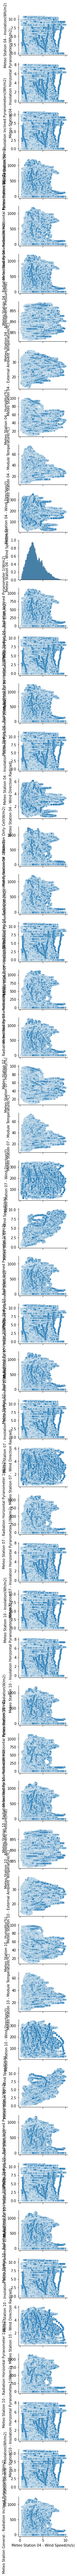

In [ ]:
import seaborn as sn
sn.pairplot(data=savgol_data_num,
                  x_vars=['Meteo Station 04 - Wind Speed(m/s)'],
                  y_vars=savgol_data_num.columns)

#### Split the data into X and Y

In [ ]:
my_data = savgol_data_num.iloc[:,:].values

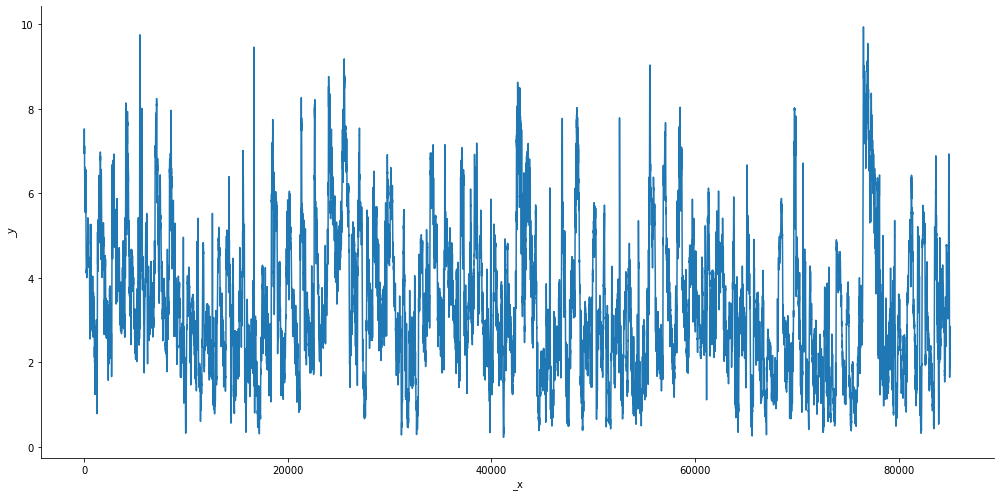

In [ ]:
sn.relplot(data=my_data[:,11], kind='line', height = 7, aspect = 2)

In [ ]:
# Split the data into X and Y
n_future = 15 # Steps to predict
n_past = 30 # Steps to use for the prediction (bajar a 30-40 minutos)***********************************************************
y_col = 11

data_X = []
data_Y = []
data_p_X = []
data_p_Y = []

for i in range(n_past, len(my_data) - n_future + 1):
    data_X.append(my_data[i - n_past:i, 0:my_data.shape[1]])
#     train_Y.append(data_split[i + n_future - 1:i + n_future, 0])
    data_Y.append(my_data[i:i + n_future, y_col])
# del data_train
data_X, data_Y = np.array(data_X), np.array(data_Y)
print(f'Shape of data_X: {data_X.shape}')
print(f'Shape of data_Y: {data_Y.shape}')

# # Test data
# for i in range(n_past, len(data_test) - n_future + 1):
#     test_X.append(data_test[i - n_past:i, 0:data_test.shape[1]])
# #     train_Y.append(data_split[i + n_future - 1:i + n_future, 0])
#     test_Y.append(data_test[i:i + n_future, y_col])
# # del data_test
# test_X, test_Y = np.array(test_X), np.array(test_Y)
# print(f'Shape of test_X: {test_X.shape}')
# print(f'Shape of test_Y: {test_Y.shape}')

# Test_prediction data
# Test data
for i in range(n_past, len(my_data) - n_future + 1, n_future):
    data_p_X.append(my_data[i - n_past:i, 0:my_data.shape[1]])
#     train_Y.append(data_split[i + n_future - 1:i + n_future, 0])
    data_p_Y.append(my_data[i:i + n_future, y_col])
# del data_test
data_p_X, data_p_Y = np.array(data_p_X), np.array(data_p_Y)
print(f'Shape of data_p_X: {data_p_X.shape}')
print(f'Shape of data_p_Y: {data_p_Y.shape}')

Shape of data_X: (85038, 30, 53)
Shape of data_Y: (85038, 15)
Shape of data_p_X: (5670, 30, 53)
Shape of data_p_Y: (5670, 15)


#### Split the data into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.33, random_state=42, shuffle=False)

In [ ]:
print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_Y: {train_Y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_Y: {test_Y.shape}')

Shape of train_X: (56975, 30, 53)
Shape of train_Y: (56975, 15)
Shape of test_X: (28063, 30, 53)
Shape of test_Y: (28063, 15)


#### LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
import pandas as pd
from tensorflow import keras

In [ ]:
keras.backend.clear_session()
lstm_model = Sequential()
lstm_model.add(Input(shape=[train_X.shape[-2], train_X.shape[-1]]))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(100, activation='tanh', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1024))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, activation='tanh', return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1024))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(512))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(train_Y.shape[1]))

In [ ]:
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 30, 53)            0         
                                                                 
 lstm (LSTM)                 (None, 30, 100)           61600     
                                                                 
 dropout_1 (Dropout)         (None, 30, 100)           0         
                                                                 
 dense (Dense)               (None, 30, 1024)          103424    
                                                                 
 dropout_2 (Dropout)         (None, 30, 1024)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                135296    
                                                                 
 dropout_3 (Dropout)         (None, 32)                0

In [ ]:
history = lstm_model.fit(train_X, train_Y, epochs = 20, batch_size = 50, validation_data=(test_X, test_Y), verbose=1)

Epoch 1/20
1140/1140 [==============================] - 180s 155ms/step - loss: 1.7130 - val_loss: 1.6606
Epoch 2/20
1140/1140 [==============================] - 175s 154ms/step - loss: 1.1310 - val_loss: 1.4432
Epoch 3/20
1140/1140 [==============================] - 175s 153ms/step - loss: 1.0164 - val_loss: 1.2898
Epoch 4/20
1140/1140 [==============================] - 175s 153ms/step - loss: 0.9402 - val_loss: 1.2167
Epoch 5/20
1140/1140 [==============================] - 175s 153ms/step - loss: 0.8954 - val_loss: 1.0570
Epoch 6/20
1140/1140 [==============================] - 175s 153ms/step - loss: 0.8514 - val_loss: 1.5826
Epoch 7/20
1140/1140 [==============================] - 175s 153ms/step - loss: 0.8213 - val_loss: 1.2954
Epoch 8/20
1140/1140 [==============================] - 174s 153ms/step - loss: 0.8106 - val_loss: 1.2955
Epoch 9/20
1140/1140 [==============================] - 174s 153ms/step - loss: 0.7945 - val_loss: 1.0604
Epoch 10/20
1140/1140 [=======================

In [ ]:
__forecast = lstm_model.predict(data_p_X)

In [ ]:
_forecast = __forecast
_y_test = data_p_Y

In [ ]:
# Inverse scaling
_forecast = _forecast.reshape(_forecast.shape[0]*_forecast.shape[1], 1)
forecast_dummy = np.zeros((_forecast.shape[0], my_data.shape[-1]-1))
_forecast = np.append(_forecast, forecast_dummy, axis=1)
# _forecast = scaler.inverse_transform(_forecast)
_forecast = _forecast[:,0]

_y_test = _y_test.reshape(_y_test.shape[0]*_y_test.shape[1], 1)
y_test_dummy = np.zeros((_y_test.shape[0], my_data.shape[-1]-1))
_y_test = np.append(_y_test, y_test_dummy, axis=1)
# _y_test = scaler.inverse_transform(_y_test)
_y_test = _y_test[:,0]

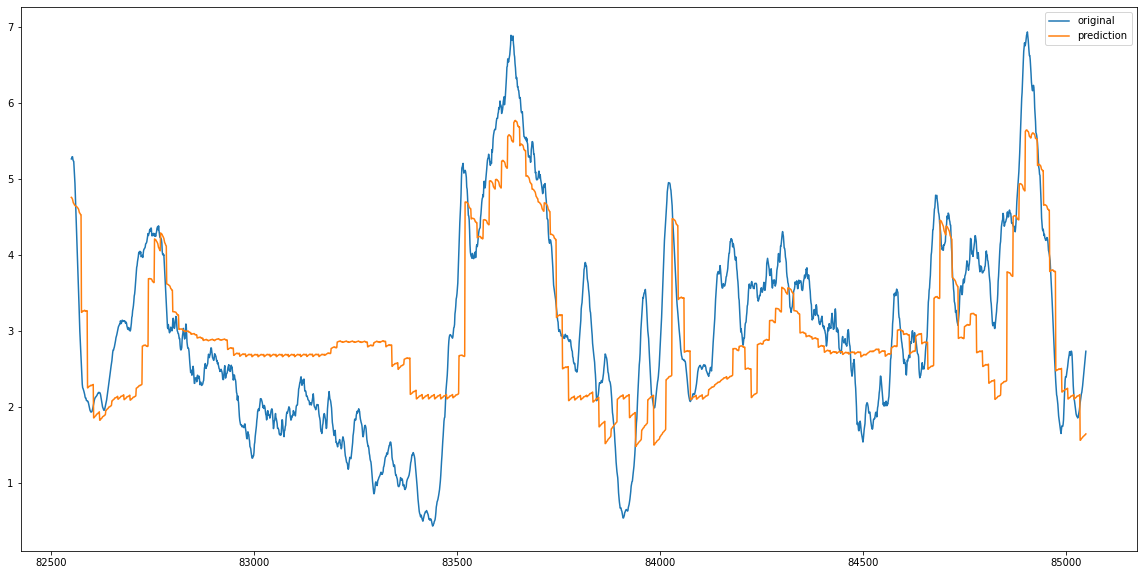

In [ ]:
data_plot = pd.DataFrame(data = {'original': _y_test, 'prediction': _forecast})
data_plot[-2500:].plot(figsize=(20,10))

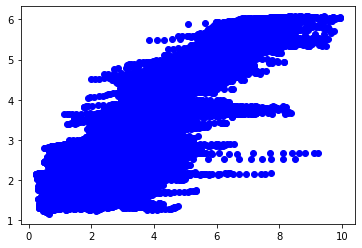

In [ ]:
plt.plot(data_plot.original, data_plot.prediction, 'bo')

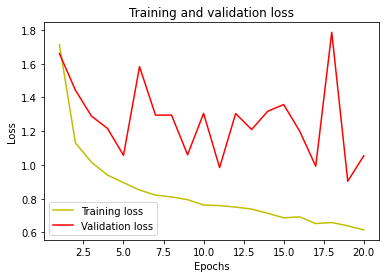

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()